In [1]:
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
%matplotlib inline
import os, sys
import numpy as np
sys.path.append(os.path.abspath("../src"))

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
from gan import GAN
%load_ext autoreload
%autoreload 2

In [4]:
from keras.models import Sequential
from keras.layers import (
    Conv2D, Conv2DTranspose, LeakyReLU, Flatten, 
    Dense, Reshape, Dropout, MaxPool2D, BatchNormalization
)

In [5]:
def create_discriminator(input_dim):
    model = Sequential([
        Conv2D(16, (3,3), padding="same", input_shape=input_dim),
        LeakyReLU(),
        Conv2D(16, (3,3), padding="same"),
        LeakyReLU(),
        MaxPool2D(2),
        Conv2D(16, (3,3), padding="same"),
        LeakyReLU(),
        MaxPool2D(2),
        Conv2D(8, (3,3), padding="same"),
        LeakyReLU(),
        Flatten(),
        Dense(20),
        LeakyReLU(),
        Dense(1, activation="sigmoid")
    ])
    return model

def create_generator(noise_dim):
    model = Sequential([
        Dense(256, input_shape=(noise_dim,)),
        LeakyReLU(),
        Reshape((8, 8, 4)),
        Conv2DTranspose(16, (3, 3), strides=2, padding="same"),
        LeakyReLU(),
        Conv2D(32, (3, 3), padding="same"),
        LeakyReLU(),
        Conv2D(32, (3, 3), padding="same"),
        LeakyReLU(),
        Conv2DTranspose(32, (3, 3), strides=2, padding="same"),
        LeakyReLU(),
        Conv2D(32, (3, 3), padding="same"),
        LeakyReLU(),
        Conv2D(32, (3, 3), padding="same"),
        LeakyReLU(),
        Conv2D(1, (5, 5), padding="valid", activation="tanh")
    ])
    return model

In [6]:
noise_size = 64
model = GAN(noise_dim=noise_size,
            input_dim=(28, 28, 1),
            create_discriminator_func=create_discriminator,
            create_generator_func=create_generator)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               16640     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 4)           0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 16)        592       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [7]:
data = mnist.load_data()
train, test = data
X, y = train
# X = X[y==7]
X = X.astype(np.float32) / 128 - 1
X = np.expand_dims(X, 3)

In [8]:
predictions = []
noise = np.random.normal(0, 1, (64, noise_size))


0


/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


2.8071468,0.23517698, 0.0,0.89186865


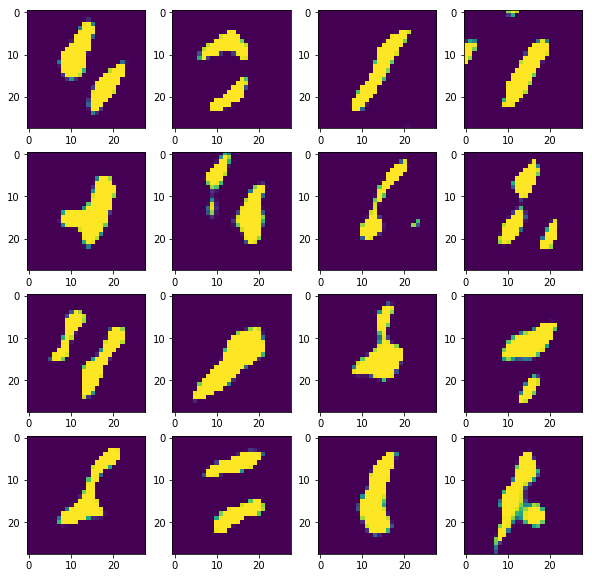

1
0.94969517,0.6210772, 0.0,0.67385316


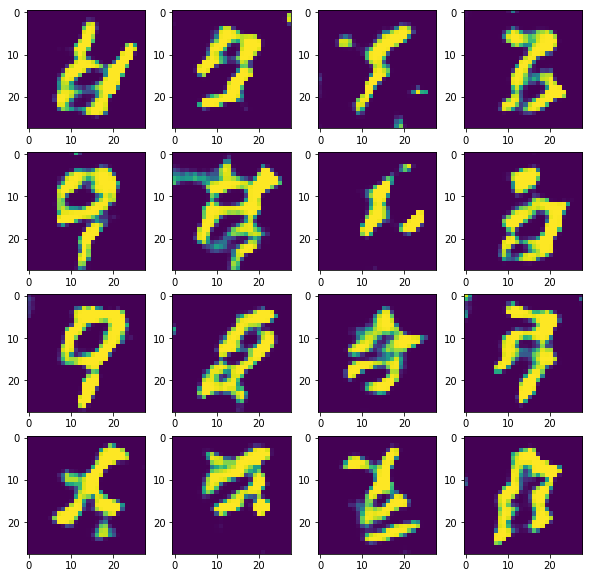

2
0.86799884,0.6285999, 0.0,0.6478115


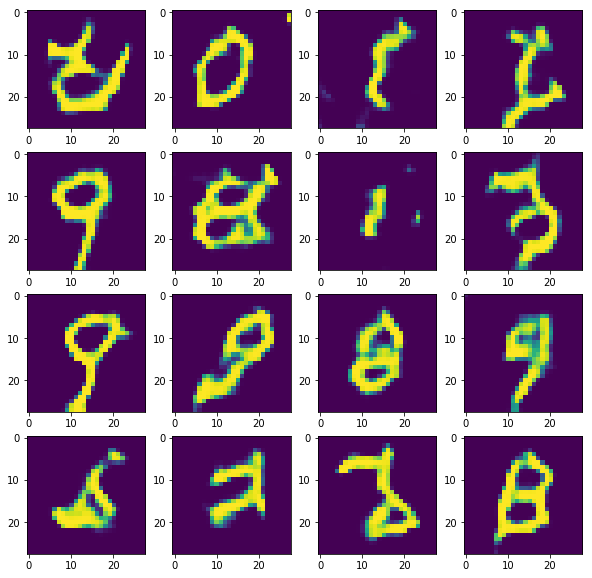

3
0.819012,0.6495459, 0.0,0.62284654


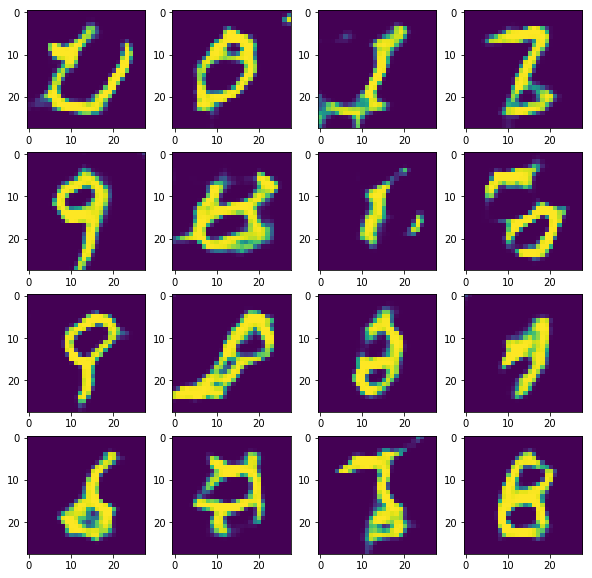

4
0.7899542,0.6622159, 0.0,0.6036659


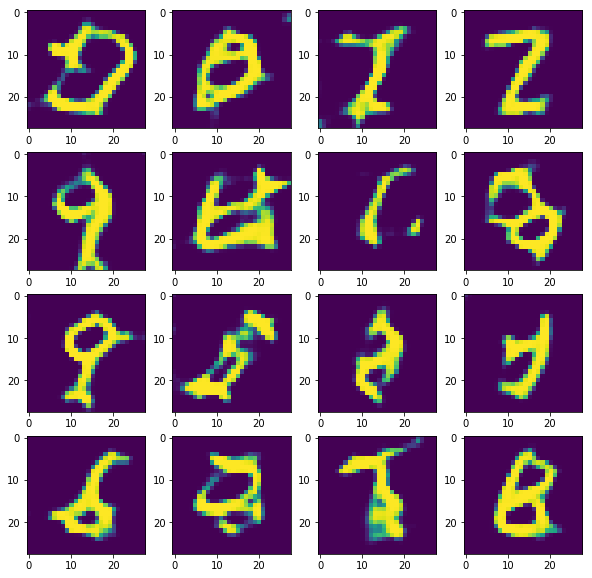

5
0.80819625,0.65877044, 0.0,0.6127304


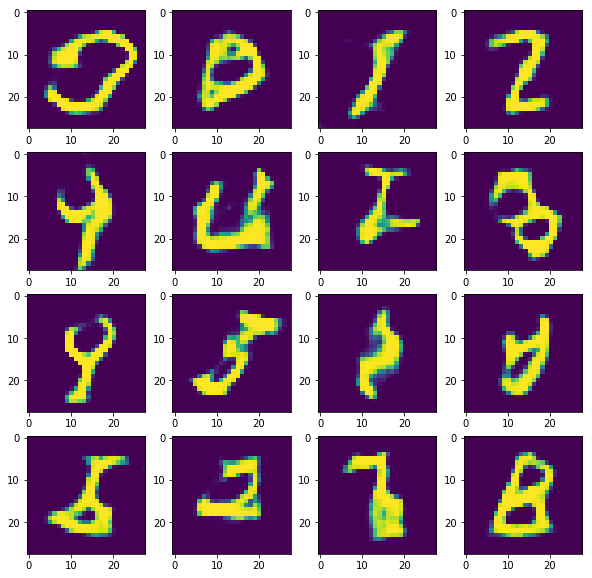

6
0.8114818,0.6520263, 0.0,0.6217448


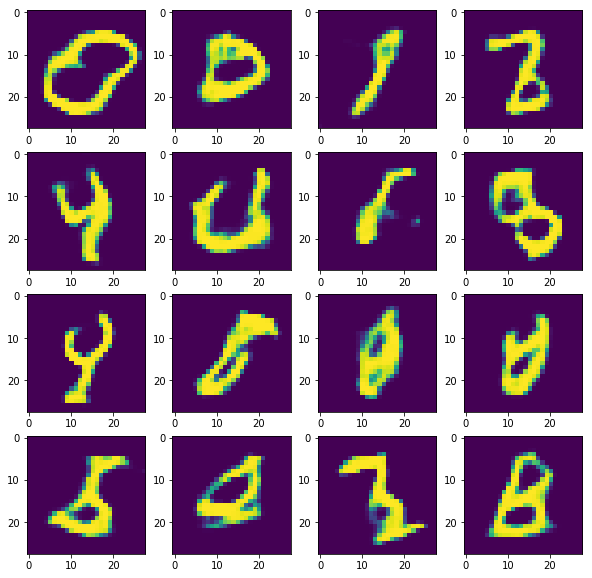

7
0.80827385,0.64712876, 0.0,0.63100964


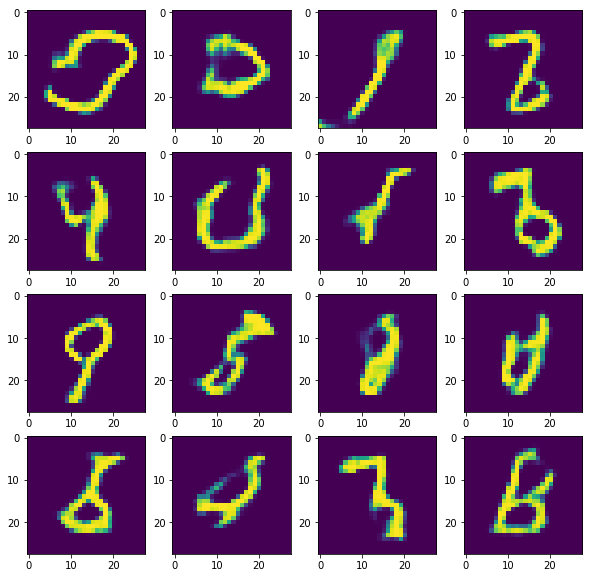

8
0.8059087,0.64487046, 0.0,0.6352581


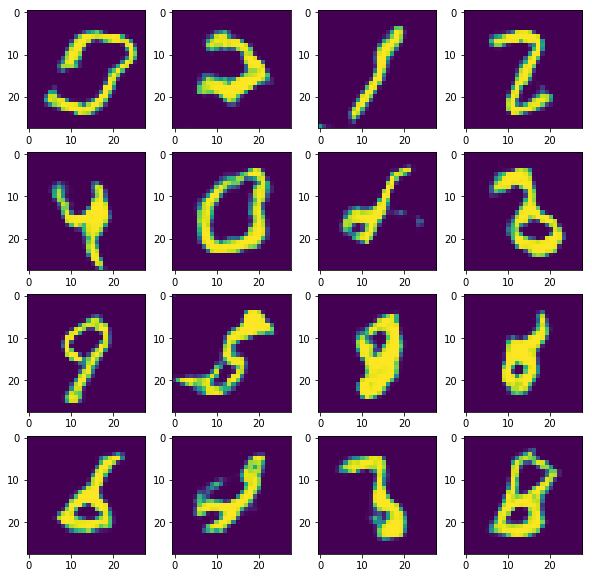

9
0.8022108,0.6469555, 0.0,0.628973


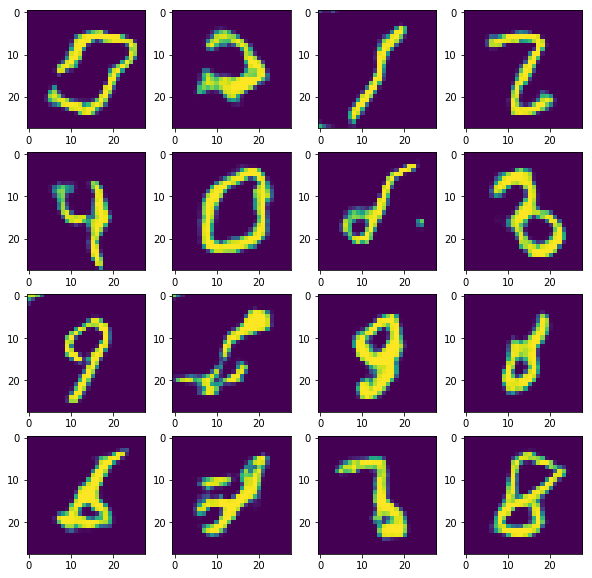

10
0.8061509,0.6475736, 0.0,0.6291149


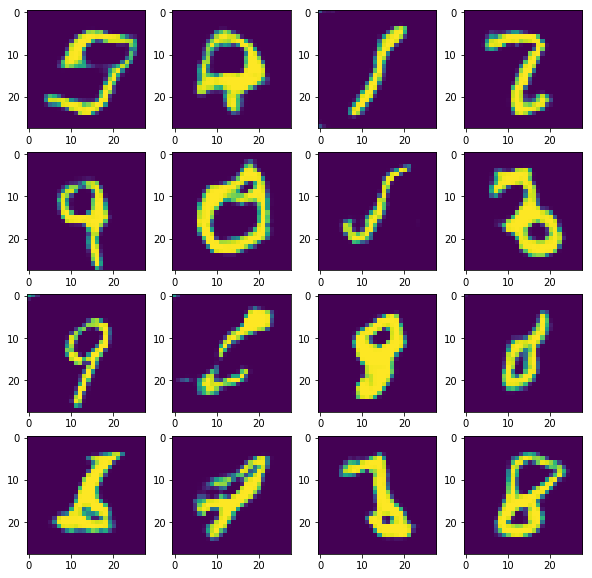

11
0.80236167,0.64601165, 0.0,0.6315772


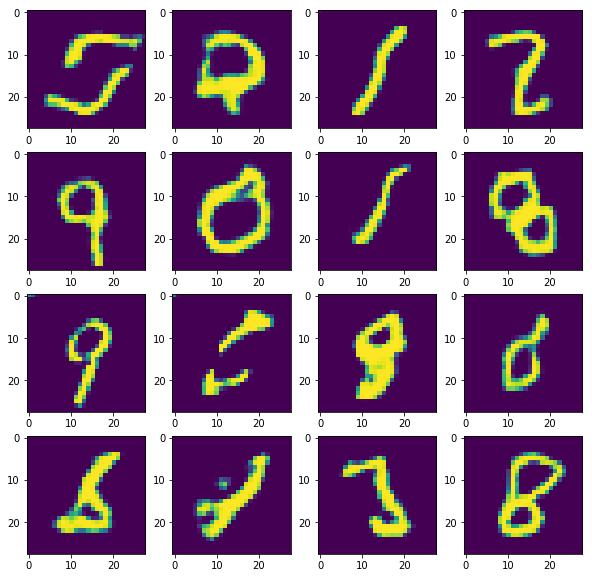

12
0.80626744,0.6457351, 0.0,0.6299162


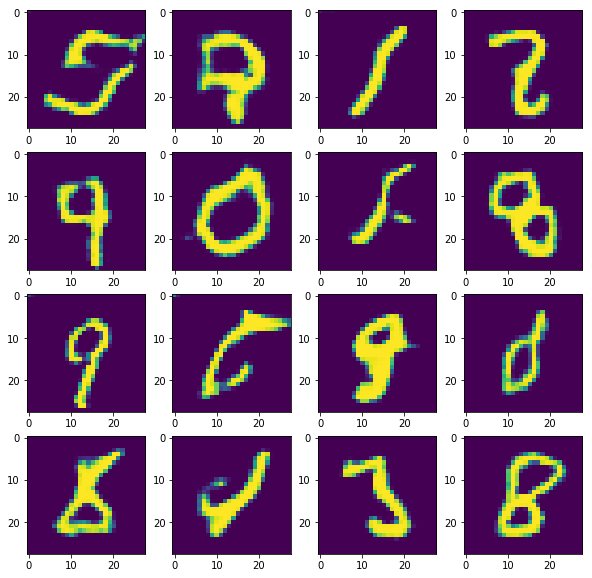

13
0.8152473,0.6469803, 0.0,0.62418205


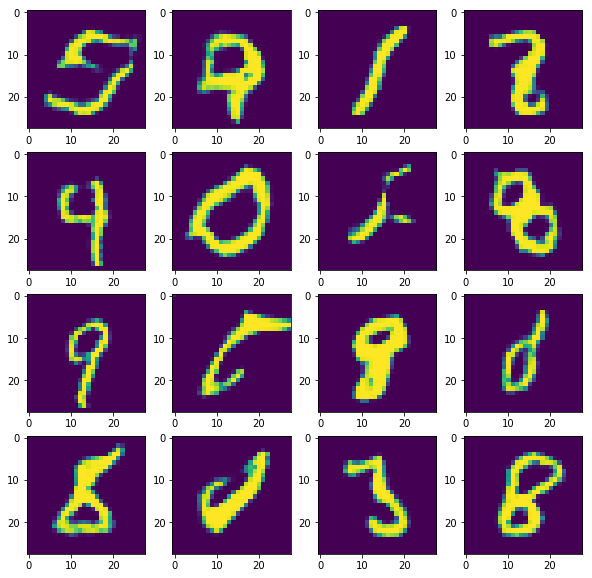

14
0.81077987,0.6489246, 0.0,0.62232906


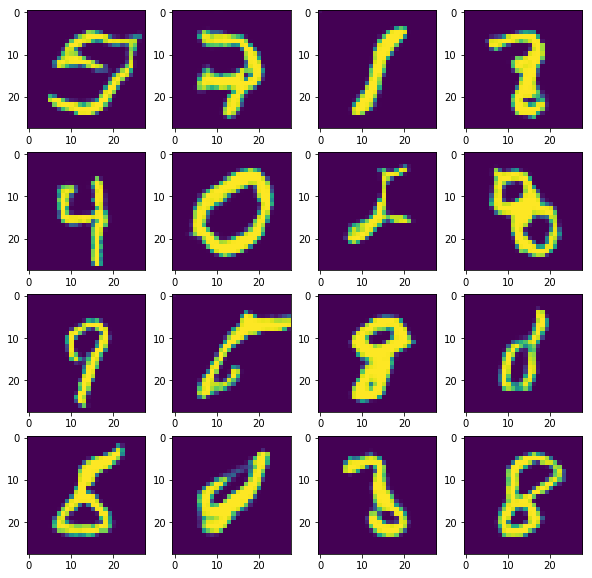

15
0.8024284,0.64932877, 0.0,0.6207349


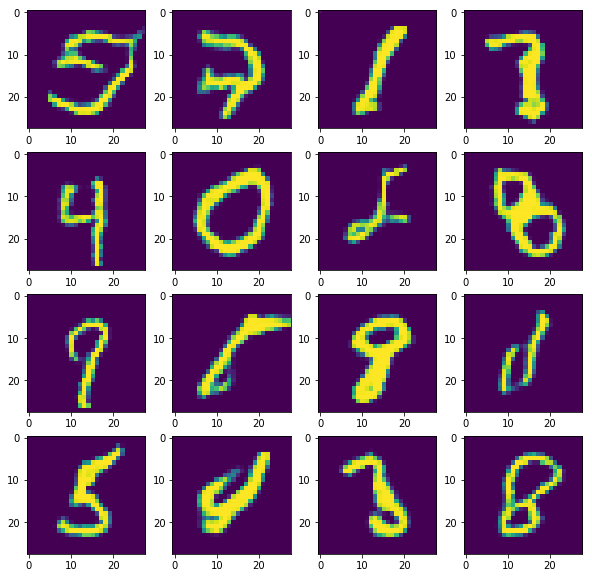

16
0.8017543,0.6511757, 0.0,0.6184729


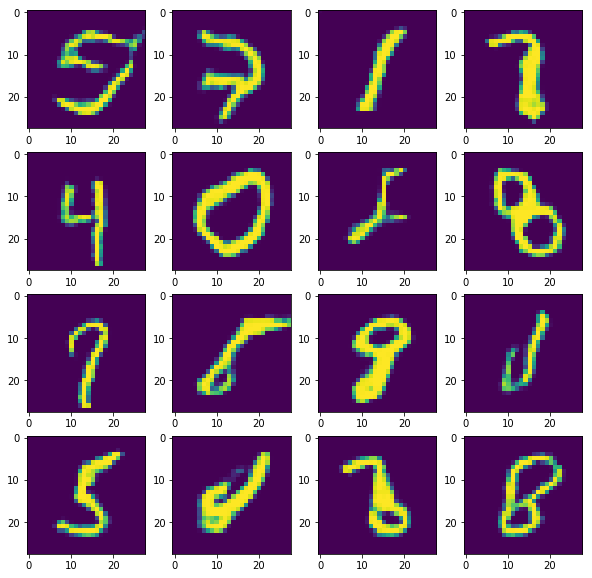

17
0.8042008,0.6514019, 0.0,0.6190405


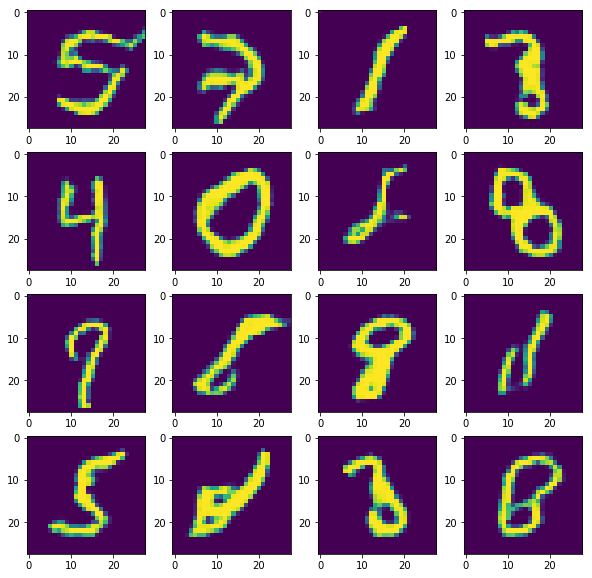

18
0.8107734,0.652221, 0.0,0.61692876


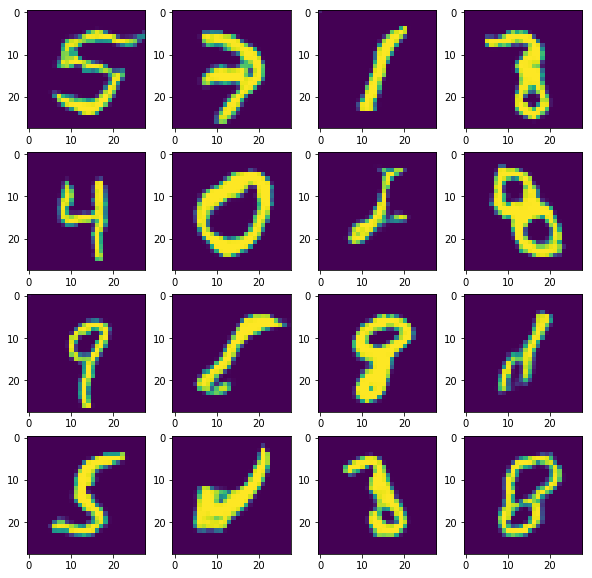

19
0.8086964,0.65091217, 0.0,0.6167034


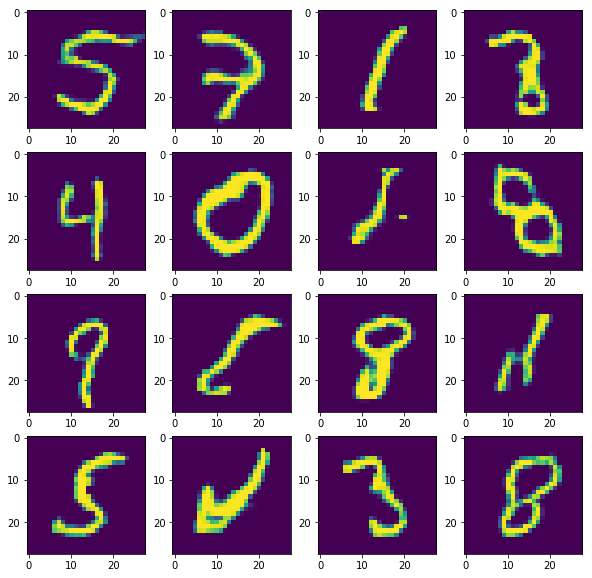

20
0.8189163,0.6499308, 0.0,0.61791366


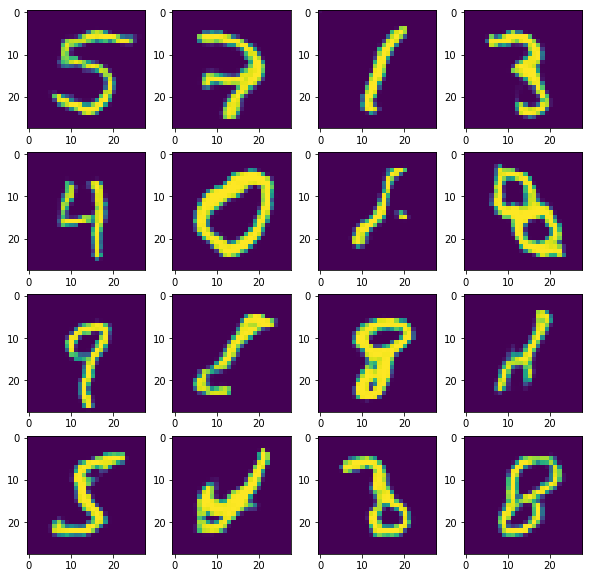

21
0.8259568,0.64796823, 0.0,0.61848956


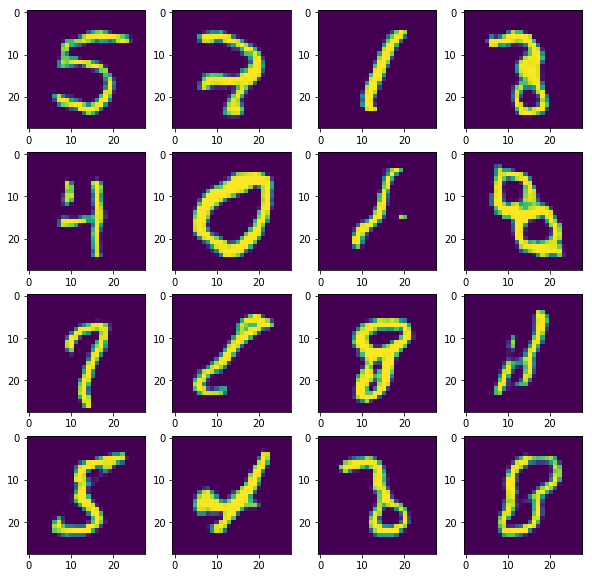

22
0.84304017,0.6482689, 0.0,0.6175715


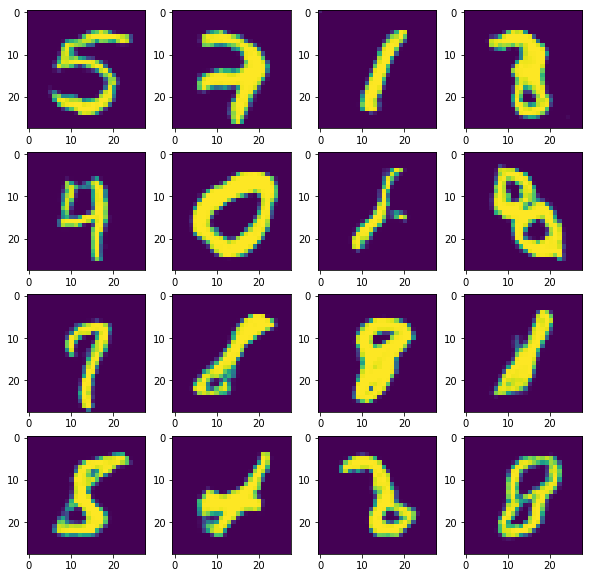

23
0.8420421,0.6445703, 0.0,0.6233974


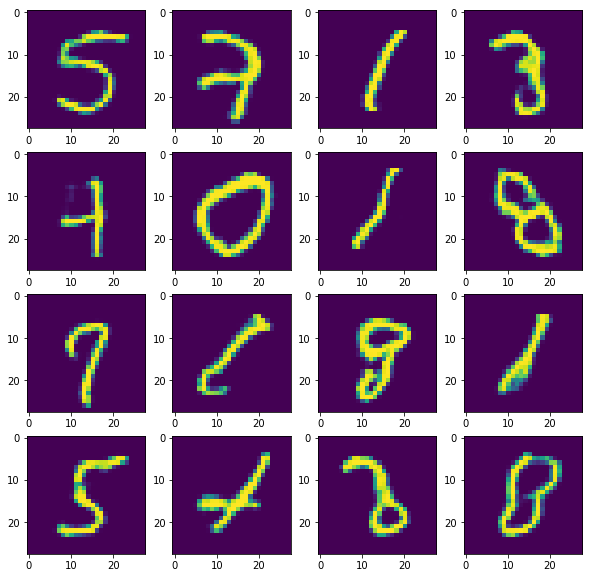

24
0.8452358,0.6452381, 0.0,0.6210687


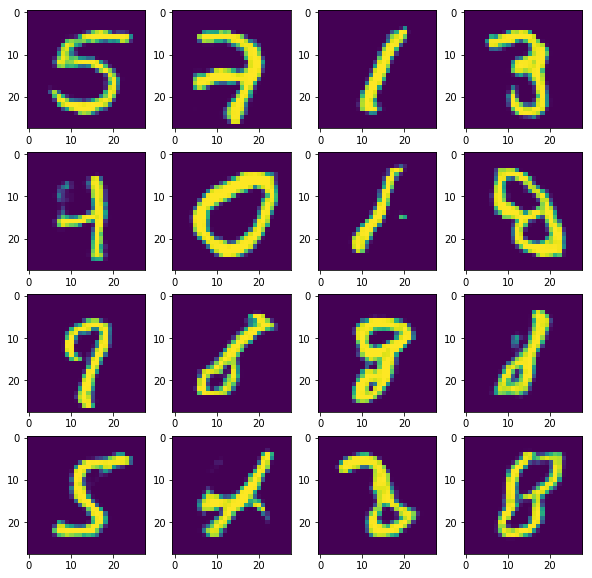

25
0.84306633,0.6416334, 0.0,0.6250417


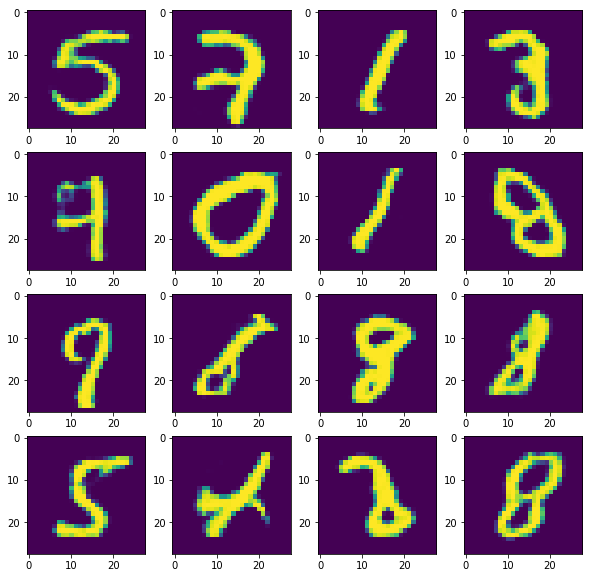

26
0.84624904,0.64516705, 0.0,0.62005043


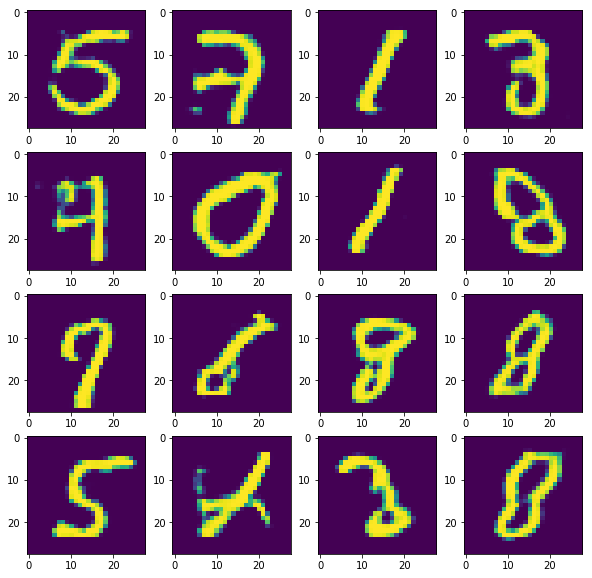

27
0.8433886,0.6441882, 0.0,0.6201005


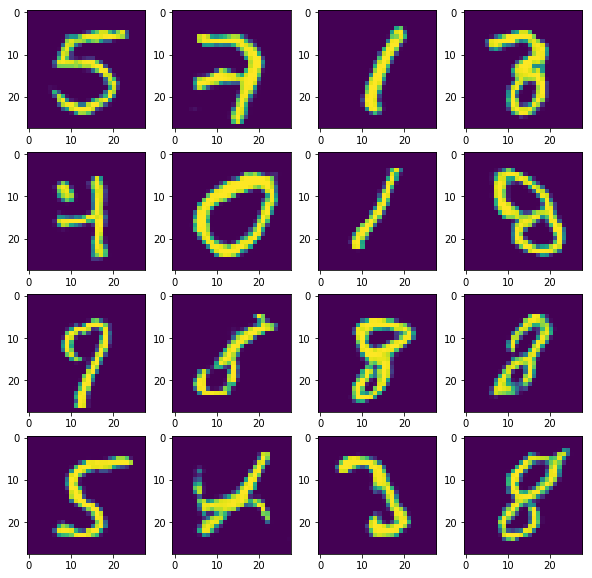

28
0.83718795,0.64399415, 0.0,0.6189653


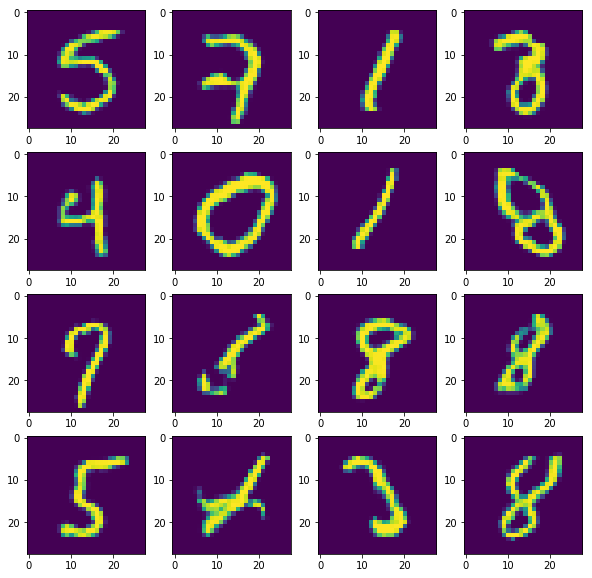

29
0.836565,0.6441011, 0.0,0.6156851


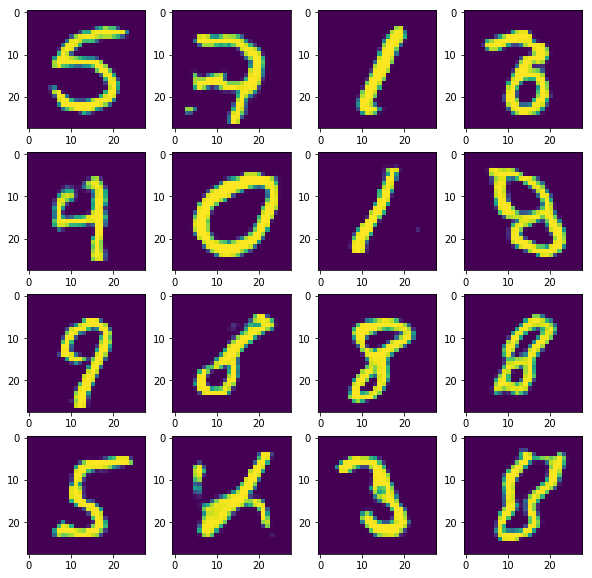

30
0.83389467,0.64305884, 0.0,0.61582696


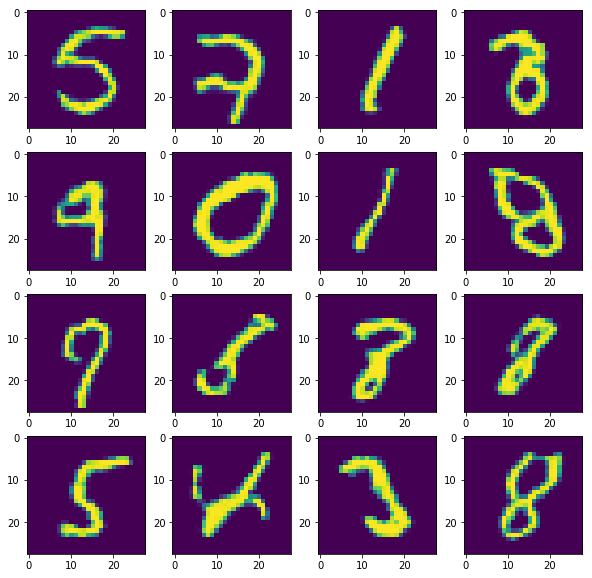

31
0.83902264,0.6436469, 0.0,0.6166116


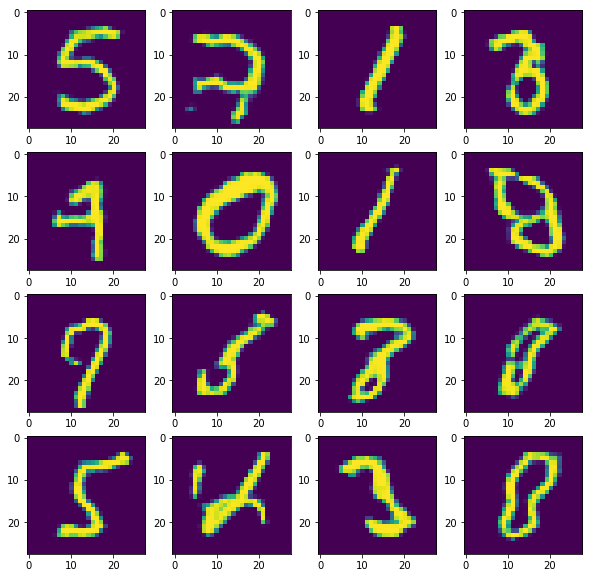

32
0.82987636,0.6430176, 0.0,0.61472523


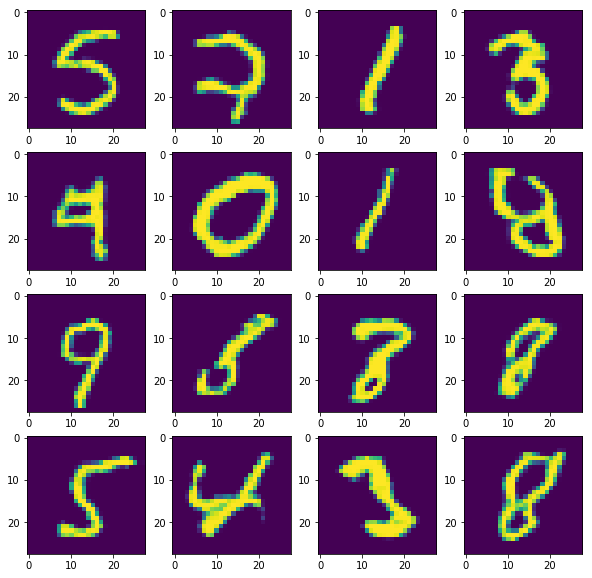

33
0.8326629,0.6449503, 0.0,0.6110861


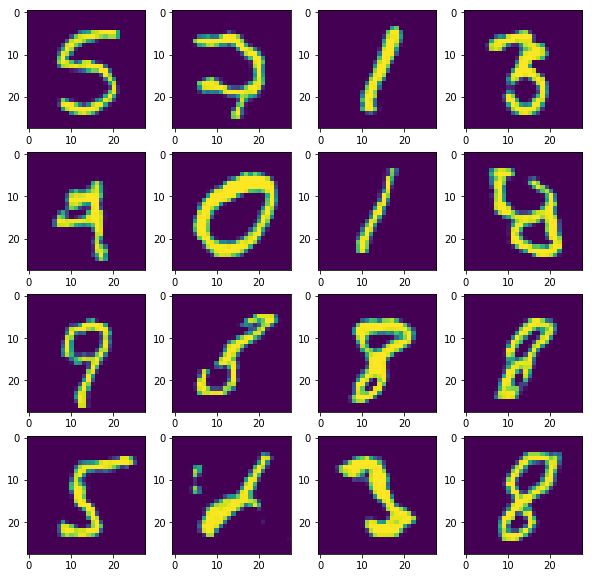

34
0.8307163,0.64366305, 0.0,0.61399907


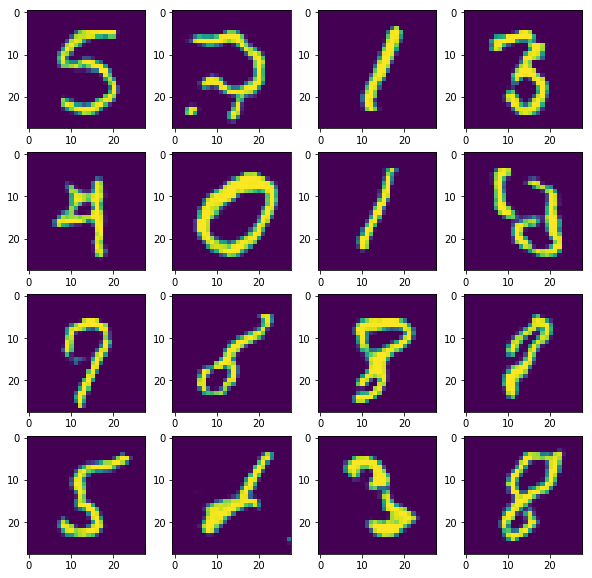

35
0.8252095,0.64437616, 0.0,0.6110026


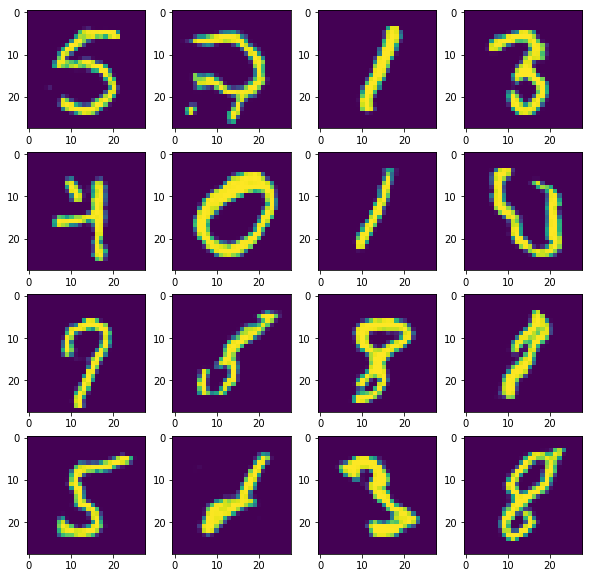

36
0.8268867,0.6442152, 0.0,0.61119455


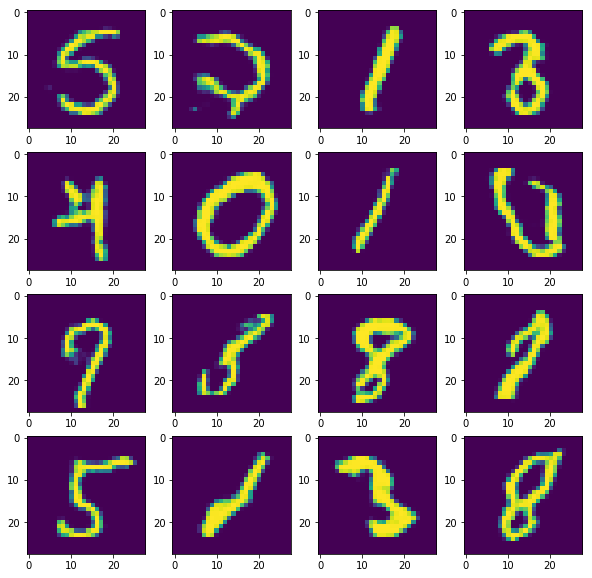

37
0.82813424,0.64656943, 0.0,0.6061699


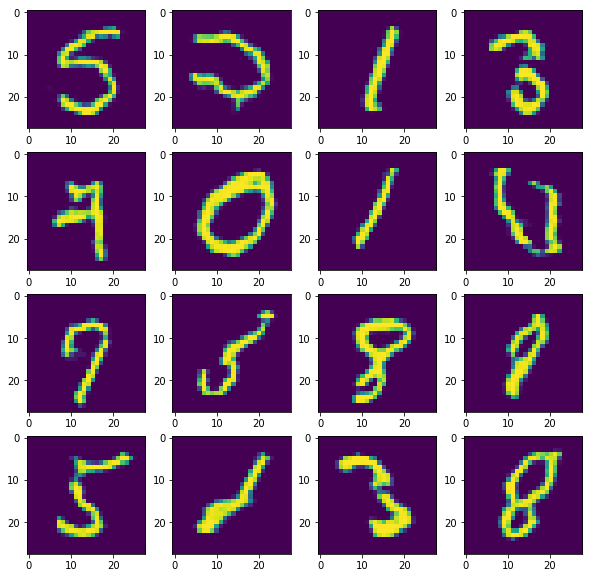

38
0.82740927,0.6463318, 0.0,0.60776407


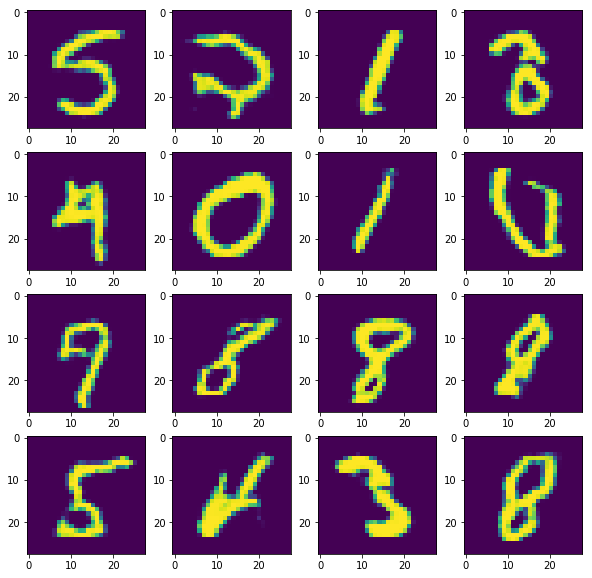

39
0.8233846,0.64794725, 0.0,0.60608643


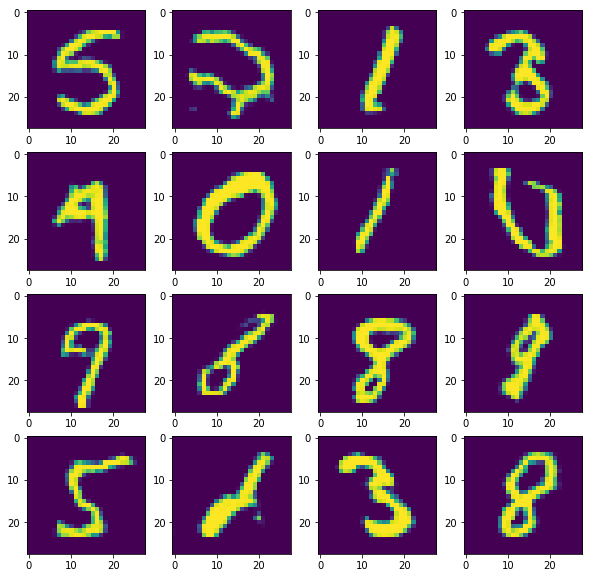

40


KeyboardInterrupt: 

In [9]:
for i in range(50):
    print(i)
    model.train(X, 1, 512)
    pred = model.generator.predict(noise)
    predictions.append(pred)
    plt.figure(figsize=(10, 10))
    for j in range(16):
        plt.subplot(4, 4, j+1)
        plt.imshow(pred[j,:,:,0])
    plt.show()

In [10]:
model.discriminator.save("mnist_discriminator.h5")
model.generator.save("mnist_generator.h5")

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig, axes = plt.subplots(8, 8)
fig.set_figheight(10)
fig.set_figwidth(10)
axes = axes.ravel()
ims =  [ ax.imshow(predictions[0][i,:,:,0], 
                   vmin=-1, vmax=1, cmap="gray_r",
                   animated=True)
         for i, ax in enumerate(axes)
       ]
for ax in axes:
    ax.axis("off")


def animate(i):
    for j, im in enumerate(ims):
        im.set_array(predictions[i][j,:,:,0])
    return ims


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=len(predictions), interval=100, blit=True)
plt.close(fig)

In [12]:
anim.save("numbers.mp4")

In [13]:
HTML(anim.to_html5_video())

In [14]:
def interpolate(model, left, right, n=10):
    left = left.reshape(1, -1)
    right = right.reshape(1, -1)
    alpha = np.linspace(0, 1, n).reshape(-1, 1)
    interpolation = alpha * right + (1 - alpha) * left
    interpolation_numbers = model.generator.predict(interpolation)
    
    plt.figure(figsize=(n*2, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        ax.imshow(interpolation_numbers[i, :, :, 0], vmin=-1, vmax=1, cmap="gray_r")
        ax.axis('off')

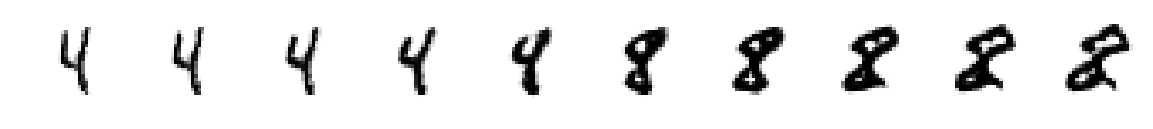

In [48]:
interpolate(model, np.random.normal(size=64), np.random.normal(size=64))